In [89]:
#Import dependencies
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
#Connect to postgres
conn = psycopg2.connect(host = "localhost",
                        database = "postgres",
                        user = "postgres",
                        password = "postgres")
#Enable cursor
cur = conn.cursor()

#Execute sql query
salaries = cur.execute("select * from salaries")

#Fetch data from query
rows = cur.fetchall()

#Loop through data rows and pull out data in Salary column
salary = []
for row in rows:
    salary.append(row[1])

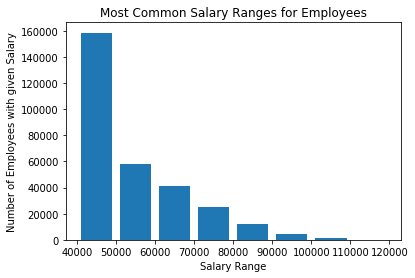

In [99]:
#Assign bins for histogram
bins=[40000,50000,60000,70000,80000,90000,100000,110000,120000]

#Plot histogram and label
plt.hist(salary, bins, histtype='bar', rwidth=0.8)
plt.xlabel('Salary Range')
plt.ylabel('Number of Employees with given Salary')
plt.title('Most Common Salary Ranges for Employees')

plt.show()

In [94]:
#Execute sql query on title_salary join view
salaries = cur.execute("select * from title_salary")

#Fetch data from query
rows = cur.fetchall()

#Loop through data rows and pull out data in Salary and Title columns, append to arrays
salary = []
title = []
for row in rows:
    salary.append(row[1])
    title.append(row[0])

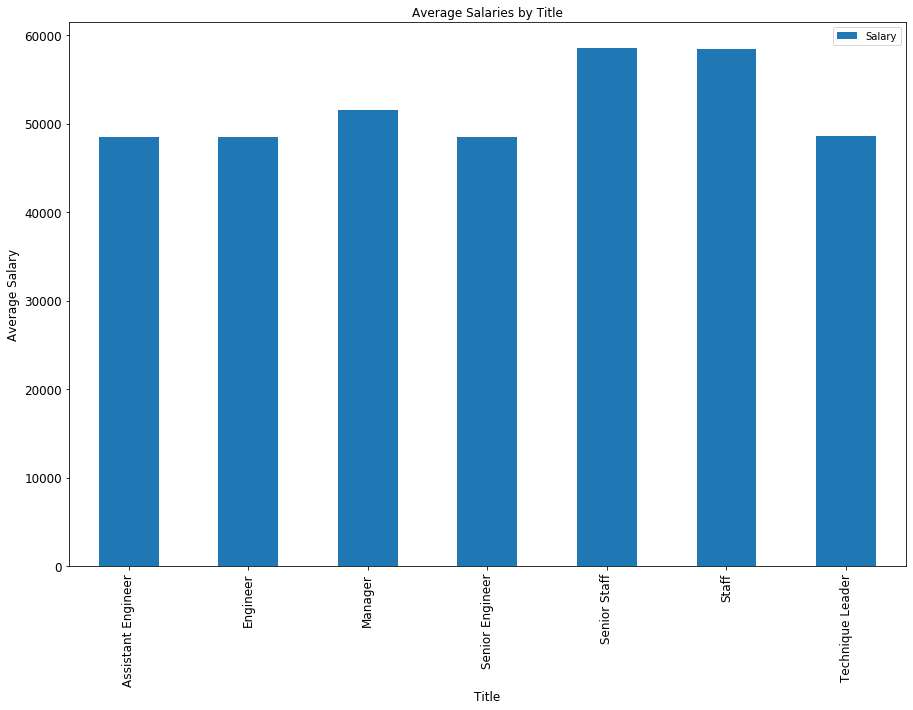

In [95]:
#Create Dataframe with title and salary
df = pd.DataFrame({"Title": title, "Salary": salary})

#Groupby title and get mean of each title
grouped_data = round(df.groupby(['Title']).mean())

#Plot means
ax = grouped_data['Salary'].plot(kind='bar', title ="Average Salaries by Title", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Title", fontsize=12)
ax.set_ylabel("Average Salary", fontsize=12)
plt.show()